## Analysis and prediction from international football matches

In [385]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [386]:
results = pd.read_csv('archive/results.csv')
shootouts = pd.read_csv('archive/shootouts.csv')

In [387]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [388]:
shootouts.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1972-05-19,Thailand,Cambodia,Thailand
4,1973-07-26,Malaysia,Kuwait,Malaysia


In [389]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43752 entries, 0 to 43751
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        43752 non-null  object
 1   home_team   43752 non-null  object
 2   away_team   43752 non-null  object
 3   home_score  43752 non-null  int64 
 4   away_score  43752 non-null  int64 
 5   tournament  43752 non-null  object
 6   city        43752 non-null  object
 7   country     43752 non-null  object
 8   neutral     43752 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [390]:
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       495 non-null    object
 1   home_team  495 non-null    object
 2   away_team  495 non-null    object
 3   winner     495 non-null    object
dtypes: object(4)
memory usage: 15.6+ KB


In [391]:
results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [392]:
shootouts.isna().sum()

date         0
home_team    0
away_team    0
winner       0
dtype: int64

In [393]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [394]:
resultshootmerge = pd.merge(results, shootouts, how='left', left_on=['date', 'home_team', 'away_team'], 
                            right_on=['date', 'home_team', 'away_team'])

In [395]:
resultshootmerge.isna().sum()

date              0
home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
city              0
country           0
neutral           0
winner        43257
dtype: int64

In [396]:
resultshootmerge['winners'] = np.select([resultshootmerge['home_score'] > resultshootmerge['away_score'] , 
                                resultshootmerge['away_score'] > resultshootmerge['home_score']], 
                                [resultshootmerge['home_team'], resultshootmerge['away_team']], 
                                default=resultshootmerge['winner'])

In [397]:
resultshootmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43752 entries, 0 to 43751
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        43752 non-null  object
 1   home_team   43752 non-null  object
 2   away_team   43752 non-null  object
 3   home_score  43752 non-null  int64 
 4   away_score  43752 non-null  int64 
 5   tournament  43752 non-null  object
 6   city        43752 non-null  object
 7   country     43752 non-null  object
 8   neutral     43752 non-null  bool  
 9   winner      495 non-null    object
 10  winners     34132 non-null  object
dtypes: bool(1), int64(2), object(8)
memory usage: 3.7+ MB


In [398]:
resultshootmerge = resultshootmerge.drop(columns='winner')

In [399]:
resultshootmerge.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winners
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


In [400]:
resultshootmerge['winners'] = resultshootmerge['winners'].replace(np.nan, 'Draw')

In [401]:
resultshootmerge.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winners
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


### Highest number of wins - Overall

Text(0.5, 1.0, 'Winners by count')

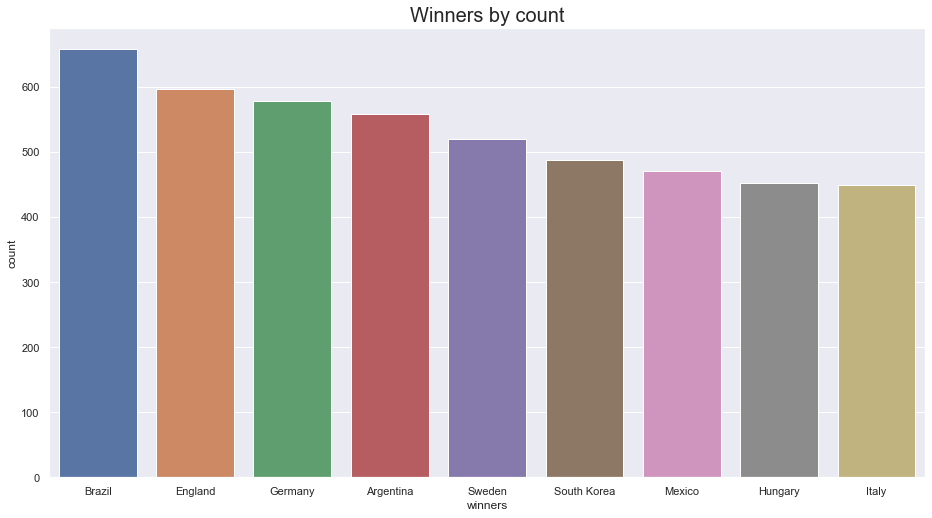

In [402]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.countplot(x=resultshootmerge['winners'], order=resultshootmerge.winners.value_counts().iloc[1:10].index).set_title("Winners by count", fontsize=20)

### Highest number of wins - 1800s

In [403]:
results1800s = resultshootmerge[resultshootmerge['date'] <= '1900-01-01']

Text(0.5, 1.0, 'Wins by count - 1800s')

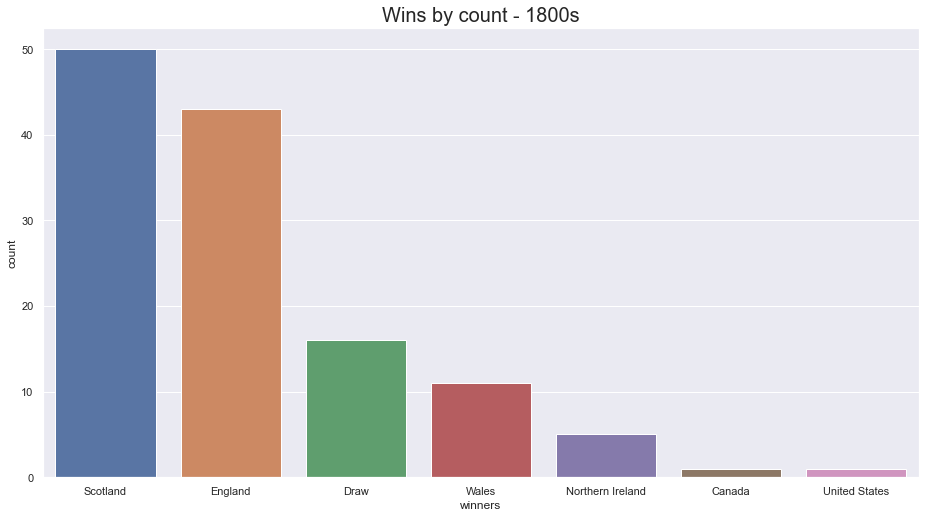

In [404]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.countplot(x=results1800s['winners'],
                order=results1800s.winners.value_counts().iloc[:10].index).set_title("Wins by count - 1800s", fontsize=20)

### Highest number of wins - 1900 - 1950

In [405]:
results1900s = resultshootmerge[resultshootmerge['date'].between('1900-01-01', '1950-12-31', inclusive='both')]

Text(0.5, 1.0, 'Wins by count - 1900 - 1950')

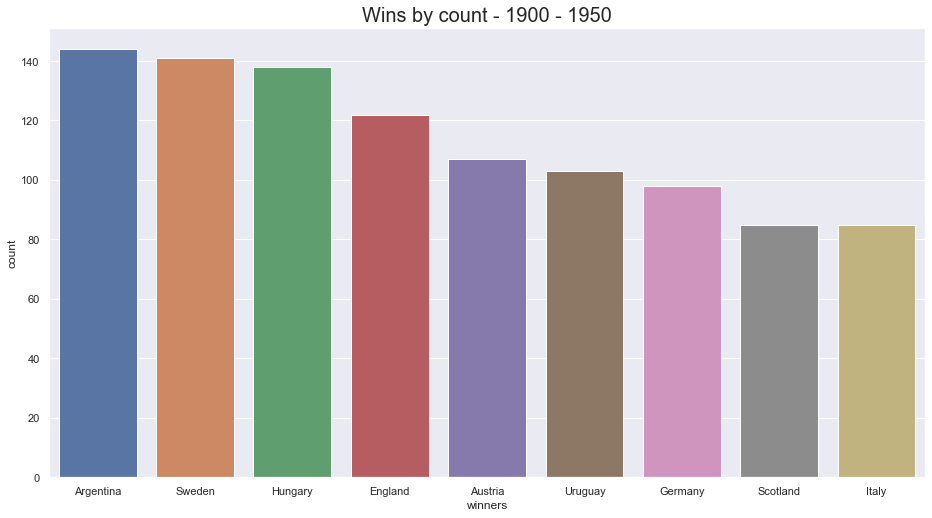

In [406]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.countplot(x=results1900s['winners'],
                order=results1900s.winners.value_counts().iloc[1:10].index).set_title("Wins by count - 1900 - 1950", fontsize=20)

### Highest number of wins - 1950 - 2000

In [407]:
results1950s = resultshootmerge[resultshootmerge['date'].between('1950-01-01', '1999-12-31', inclusive='both')]

Text(0.5, 1.0, 'Wins by count - 1950 - 2000')

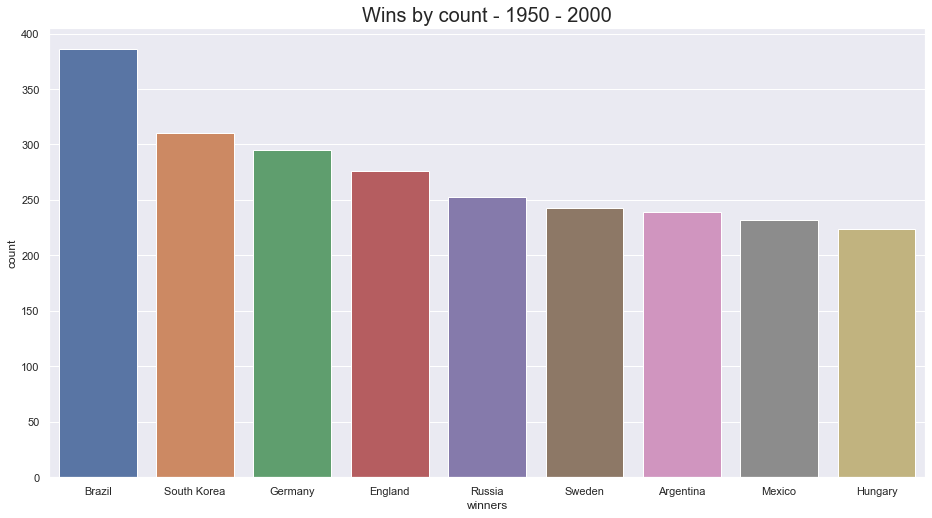

In [408]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.countplot(x=results1950s['winners'],
                order=results1950s.winners.value_counts().iloc[1:10].index).set_title("Wins by count - 1950 - 2000", fontsize=20)

### Highest number of wins after 2000

In [409]:
results2000s = resultshootmerge[resultshootmerge['date'].between('200-01-01', '2000-12-31', inclusive='both')]

Text(0.5, 1.0, 'Wins by count - 2000s')

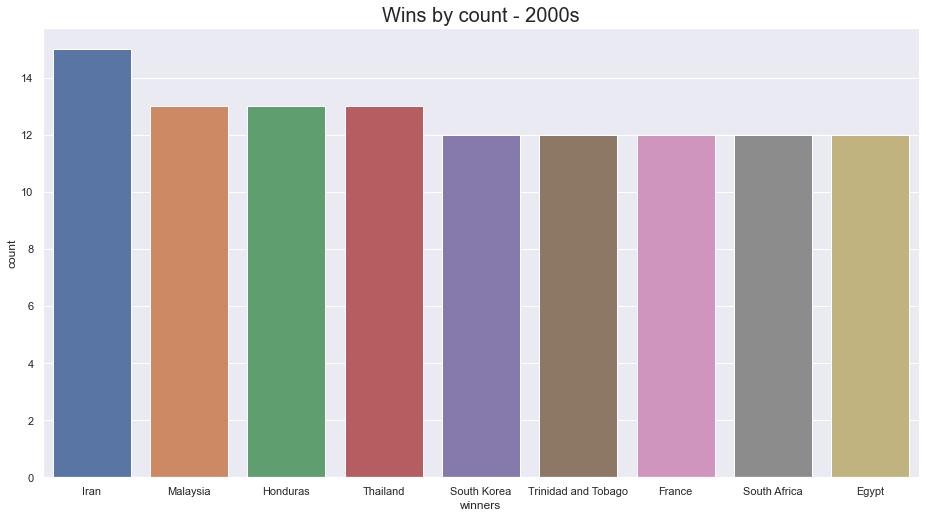

In [410]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.countplot(x=results2000s['winners'],
                order=results2000s.winners.value_counts().iloc[1:10].index).set_title("Wins by count - 2000s", fontsize=20)

#### Host advantage

In [411]:
resultshootwithoutworldcup = resultshootmerge[resultshootmerge['tournament'] != 'FIFA World Cup']

In [412]:
resultshootwithoutworldcup['hostadv'] = np.select([resultshootwithoutworldcup['winners'] == resultshootwithoutworldcup['country']], 
                                ['hostwin'], default = 'awaywin')

C:\Users\thami\AppData\Local\Temp/ipykernel_16460/756624456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultshootwithoutworldcup['hostadv'] = np.select([resultshootwithoutworldcup['winners'] == resultshootwithoutworldcup['country']],


Text(0.5, 1.0, 'Host countries win by count')

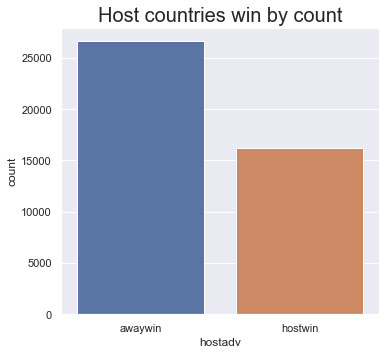

In [413]:
sns.set(rc={'figure.figsize':(5.7,5.27)})
sns.countplot(x=resultshootwithoutworldcup['hostadv'], 
            order=resultshootwithoutworldcup.hostadv.value_counts().iloc[:10].index).set_title("Host countries win by count", fontsize=20)

### World cup dominations

In [414]:
resultsworldcup = resultshootmerge[resultshootmerge['tournament'] == 'FIFA World Cup']

Text(0.5, 1.0, 'Wins by count - World cup')

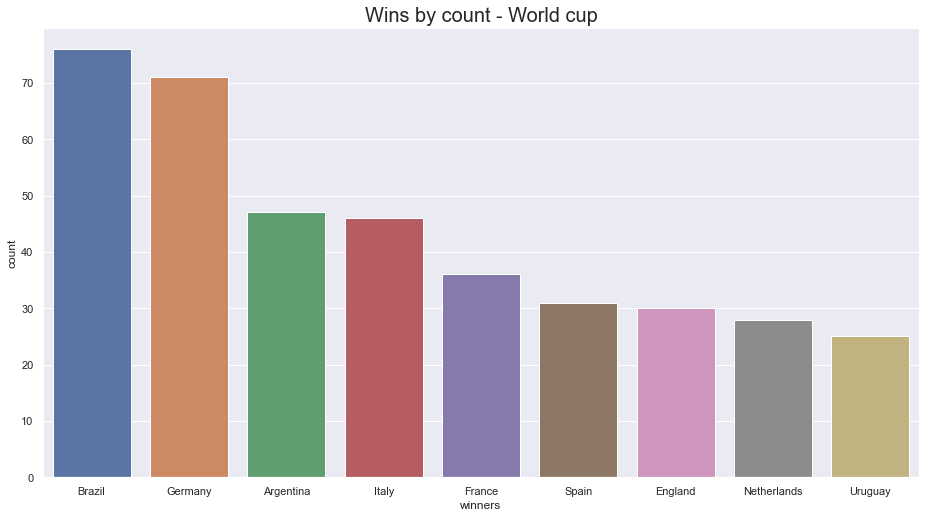

In [415]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.countplot(x=resultsworldcup['winners'],
                order=resultsworldcup.winners.value_counts().iloc[1:10].index).set_title("Wins by count - World cup", fontsize=20)

### Highest faceoff - World cups

In [416]:
homeworldgroup = resultsworldcup.groupby(['home_team', 'away_team']).size().reset_index(name = 'home_counts')

In [417]:
awayworldgroup = resultsworldcup.groupby(['away_team', 'home_team']).size().reset_index(name = 'away_counts')

In [418]:
homeawaysample = pd.merge(homeworldgroup, awayworldgroup, how='inner', left_on=['home_team', 'away_team'], 
                            right_on=['away_team', 'home_team'])

In [419]:
homeawayfinal = homeawaysample.filter(['home_team_x', 'away_team_x'])
homeawayfinal = homeawayfinal.rename({'home_team_x':'team1', 'away_team_x':'team2'}, axis='columns')
homeawayfinal['totalcount'] = homeawaysample['home_counts'] + homeawaysample['away_counts']

In [420]:
dfdup = pd.DataFrame(np.sort(homeawayfinal[['team1','team2']], axis=1))

In [421]:
homeawayfinal = homeawayfinal[~dfdup.duplicated()]

In [422]:
homeawayfinal = homeawayfinal.nlargest(columns='totalcount',n=10)

Text(0.5, 1.0, 'Highest number of faceoffs in world cup')

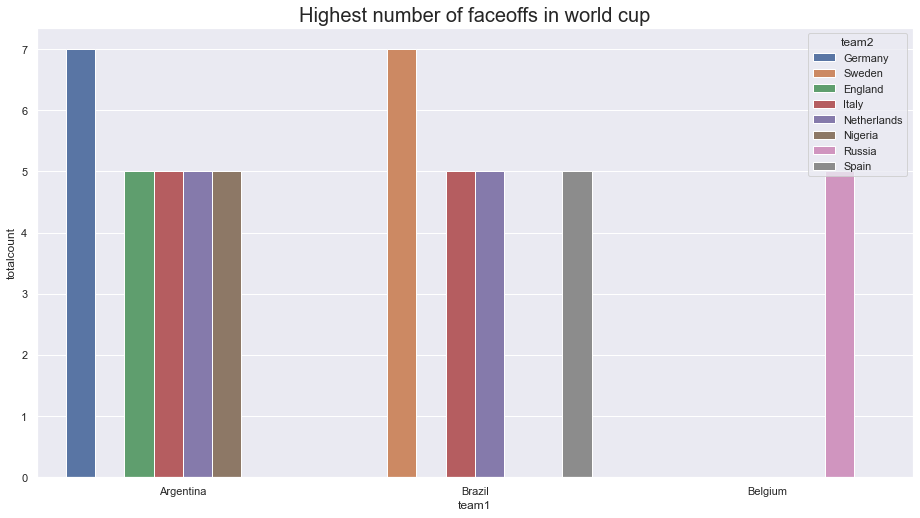

In [423]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.barplot(x=homeawayfinal['team1'], y=homeawayfinal['totalcount'], 
            hue=homeawayfinal['team2']).set_title('Highest number of faceoffs in world cup', fontsize = 20)

### Home advantage

#### Highest number of world cup hosted

In [424]:
hostadvantage = resultsworldcup.filter(['date', 'winners', 'country'])

In [425]:
hostadvantage['date'] =  pd.to_datetime(hostadvantage['date'])
hostadvantage['date'] = pd.DatetimeIndex(hostadvantage['date']).year

In [426]:
winnersworldcup = hostadvantage.groupby(['date', 'country']).tail(1)
winnersworldcup = winnersworldcup[winnersworldcup['country'] != 'South Korea']

In [427]:
winnersworldcup[winnersworldcup['date'] == 1950] = winnersworldcup[winnersworldcup['date'] == 1950].replace('Sweden', 'Uruguay')

In [428]:
winnersworldcup['country'] = winnersworldcup['country'].replace('Japan', 'Japan&South Korea')

[Text(0, 0, 'Italy'),
 Text(1, 0, 'France'),
 Text(2, 0, 'Brazil'),
 Text(3, 0, 'Mexico'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Uruguay'),
 Text(6, 0, 'Switzerland'),
 Text(7, 0, 'Sweden'),
 Text(8, 0, 'Chile'),
 Text(9, 0, 'England'),
 Text(10, 0, 'Argentina'),
 Text(11, 0, 'Spain'),
 Text(12, 0, 'United States'),
 Text(13, 0, 'Japan&South Korea'),
 Text(14, 0, 'South Africa'),
 Text(15, 0, 'Russia')]

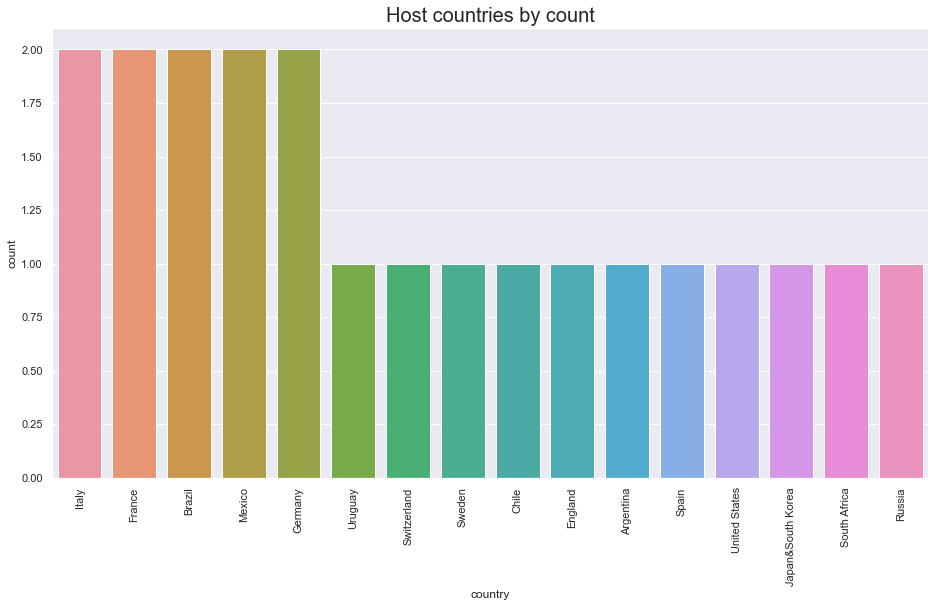

In [429]:
fig, ax = plt.subplots(figsize=(15.7, 8.27))
sns.countplot(x=winnersworldcup['country'], 
              order=winnersworldcup.country.value_counts().iloc[:20].index).set_title("Host countries by count", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [430]:
winnersworldcup['hostadv'] = np.select([winnersworldcup['winners'] == winnersworldcup['country']], ['hostwin'], default = 'awaywin')

#### Host countries win by count

Text(0.5, 1.0, 'Host countries win by count')

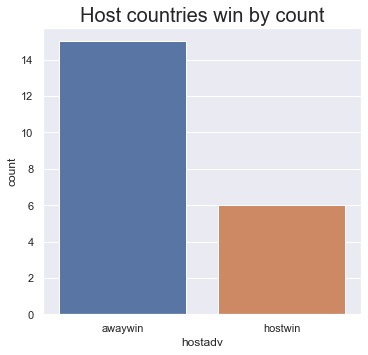

In [431]:
sns.set(rc={'figure.figsize':(5.7,5.27)})
sns.countplot(x=winnersworldcup['hostadv'], 
            order=winnersworldcup.hostadv.value_counts().iloc[:10].index).set_title("Host countries win by count", fontsize=20)

#### Highest world cup wins

Text(0.5, 1.0, 'Highest number of wins by country')

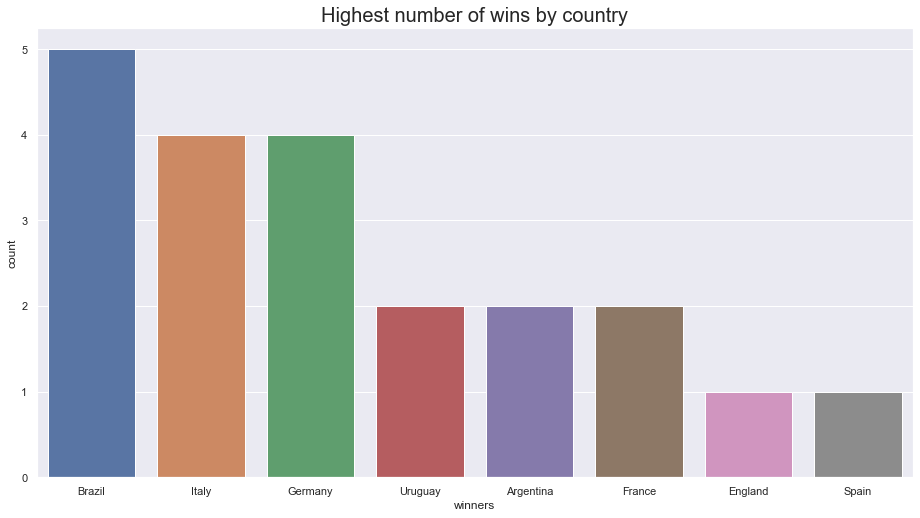

In [432]:
fig, ax = plt.subplots(figsize=(15.7, 8.27))
sns.countplot(x=winnersworldcup['winners'], 
              order=winnersworldcup.winners.value_counts().iloc[:20].index).set_title("Highest number of wins by country", fontsize=20)

#### Total number of goals scored

#### By country

In [433]:
resultsworldcup.loc[:, ('date')] =  pd.to_datetime(resultsworldcup.loc[:, ('date')])
resultsworldcup.loc[:, ('date')] = pd.DatetimeIndex(resultsworldcup.loc[:, ('date')]).year

c:\Users\thami\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [434]:
resultsworldcup['total_goals'] = resultsworldcup['home_score'] + resultsworldcup['away_score']

C:\Users\thami\AppData\Local\Temp/ipykernel_16460/4064603669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultsworldcup['total_goals'] = resultsworldcup['home_score'] + resultsworldcup['away_score']


In [435]:
totalgoalsyear = resultsworldcup.filter(['date', 'total_goals'])

In [436]:
totalgoalsyear = totalgoalsyear.groupby('date').sum().reset_index()

Text(0.5, 1.0, 'Number of goals in each world cup')

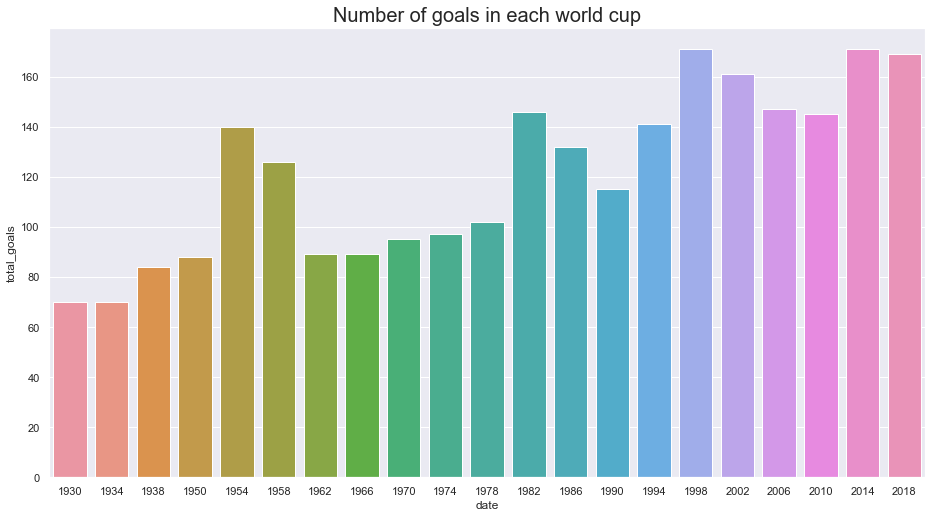

In [437]:
fig, ax = plt.subplots(figsize=(15.7, 8.27))
sns.barplot(x=totalgoalsyear['date'], y=totalgoalsyear['total_goals']).set_title("Number of goals in each world cup", 
              fontsize=20)

In [438]:
totalgoalshomecountry = resultsworldcup.filter(['home_team', 'home_score'])
totalgoalshomecountry = totalgoalshomecountry.groupby('home_team').sum().reset_index()

In [439]:
totalgoalsawaycountry = resultsworldcup.filter(['away_team', 'away_score'])
totalgoalsawaycountry = totalgoalsawaycountry.groupby('away_team').sum().reset_index()

In [440]:
totalgoalscountry = pd.merge(totalgoalshomecountry, totalgoalsawaycountry, how='inner', left_on='home_team', right_on='away_team')
totalgoalscountry['total_goals'] = totalgoalscountry['home_score'] + totalgoalscountry['away_score']

In [441]:
totalgoalscountry = totalgoalscountry.sort_values('total_goals', ascending=False).head(15)

Text(0.5, 1.0, 'Number of goals by country')

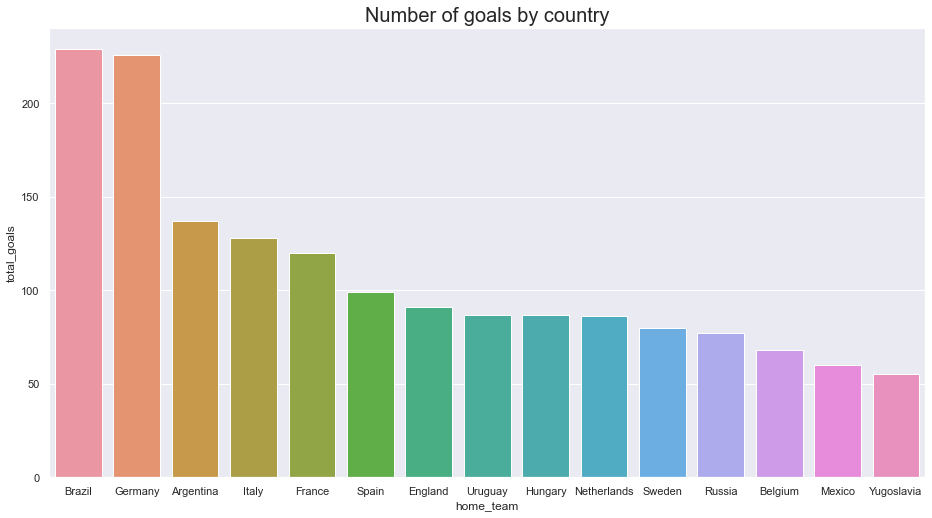

In [442]:
fig, ax = plt.subplots(figsize=(15.7, 8.27))
sns.barplot(x=totalgoalscountry['home_team'], y=totalgoalscountry['total_goals']).set_title('Number of goals by country', fontsize =20)

### 2022 world cup

In [443]:
countrieslist2022 = ['Qatar', 'Netherlands', 'Senegal', 'Ecuador', 'England', 'USA', 'Wales', 'Iran', 'Argentina', 'Poland', 
                     'Mexico', 'Saudi Arabia', 'France', 'Denmark', 'Tunisia', 'Australia', 'Germany', 'Spain', 'Japan', 'Costa Rica',
                     'Belgium', 'Croatia', 'Canada', 'Morocco', 'Brazil', 'Switzerland', 'Serbia', 'Cameroon', 'Portugal', 'Uruguay', 
                     'Ghana', 'Korea Republic']

In [444]:
resultshootmerge.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winners
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


In [445]:
resultshootworldcup2022 = resultshootmerge[resultshootmerge['home_team'].isin(countrieslist2022)]

In [446]:
resultshootworldcup2022.append(resultshootmerge[resultshootmerge['away_team'].isin(countrieslist2022)])

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winners
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Scotland
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Scotland
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,England
...,...,...,...,...,...,...,...,...,...,...
43731,2022-06-14,Jamaica,Mexico,1,1,CONCACAF Nations League,Kingston,Jamaica,False,Draw
43739,2022-06-14,Netherlands,Wales,3,2,UEFA Nations League,Rotterdam,Netherlands,False,Netherlands
43740,2022-06-14,Poland,Belgium,0,1,UEFA Nations League,Warsaw,Poland,False,Belgium
43749,2022-06-14,Chile,Ghana,0,0,Kirin Cup,Suita,Japan,True,Ghana


In [447]:
resultshootworldcup2022.loc[:, ('date')] =  pd.to_datetime(resultshootworldcup2022.loc[:, ('date')])
resultshootworldcup2022.loc[:, ('date')] = pd.DatetimeIndex(resultshootworldcup2022.loc[:, ('date')]).year

c:\Users\thami\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [448]:
resultshootworldcup2022 = resultshootworldcup2022[resultshootworldcup2022['date'] > 2006]

In [449]:
resultshootworldcup2022.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winners
29065,2007,Saudi Arabia,Gambia,3,0,Friendly,Dammam,Saudi Arabia,False,Saudi Arabia
29067,2007,Costa Rica,Nicaragua,2,0,Friendly,San José,Costa Rica,False,Costa Rica
29068,2007,Saudi Arabia,Syria,2,1,Friendly,Dammam,Saudi Arabia,False,Saudi Arabia
29074,2007,Qatar,Oman,1,1,Friendly,Doha,Qatar,False,Draw
29095,2007,Ecuador,Sweden,2,1,Friendly,Cuenca,Ecuador,False,Ecuador


### Prediction to 2022 World Cup

In [450]:
resultshootworldcup2022 =  resultshootworldcup2022.drop_duplicates()

In [451]:
resultshootworldcup2022.drop(['tournament', 'city', 'country', 'neutral'], axis=1, inplace=True)

In [452]:
resultshootworldcup2022

,date,home_team,away_team,home_score,away_score,winners
29065,2007,Saudi Arabia,Gambia,3,0,Saudi Arabia
29067,2007,Costa Rica,Nicaragua,2,0,Costa Rica
29068,2007,Saudi Arabia,Syria,2,1,Saudi Arabia
29074,2007,Qatar,Oman,1,1,Draw
29095,2007,Ecuador,Sweden,2,1,Ecuador
...,...,...,...,...,...,...
43737,2022,England,Hungary,0,4,Hungary
43738,2022,Germany,Italy,5,2,Germany
43739,2022,Netherlands,Wales,3,2,Netherlands
43740,2022,Poland,Belgium,0,1,Belgium


In [453]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [454]:
le = LabelEncoder()
resultshootworldcup2022.apply(le.fit)

date          LabelEncoder()
home_team     LabelEncoder()
away_team     LabelEncoder()
home_score    LabelEncoder()
away_score    LabelEncoder()
winners       LabelEncoder()
dtype: object

In [455]:
resultshootworldcup2022 = resultshootworldcup2022.apply(le.fit_transform)

In [456]:
resultshootworldcup2022.head()

,date,home_team,away_team,home_score,away_score,winners
29065,0,22,59,3,0,89
29067,0,6,120,2,0,26
29068,0,22,163,2,1,89
29074,0,21,127,1,1,32
29095,0,9,161,2,1,33


In [457]:
X = resultshootworldcup2022.iloc[:,:-1]

In [458]:
y = resultshootworldcup2022.iloc[:,-1:]
y = y.values.ravel()

In [459]:
rescaledX = StandardScaler().fit_transform(X)

In [460]:
from sklearn.model_selection import train_test_split

In [461]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.2, random_state=42)

In [462]:
print("xtrain shape : ", X_train.shape)
print("xtest shape  : ", X_test.shape)
print("ytrain shape : ", y_train.shape)
print("ytest shape  : ", y_test.shape)

xtrain shape :  (2447, 5)
xtest shape  :  (612, 5)
ytrain shape :  (2447,)
ytest shape  :  (612,)


In [463]:
from sklearn.ensemble import RandomForestRegressor
regfo = RandomForestRegressor()
regfo.fit(X_train, y_train)
print(regfo.score(X_test, y_test))

0.9268958919118772


In [464]:
ypredfo = regfo.predict(X_test)

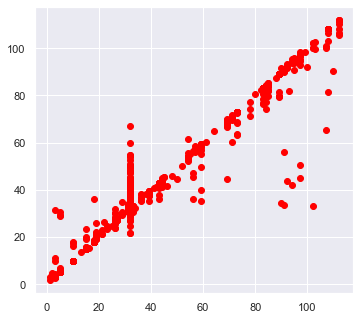

In [465]:
plt.scatter(y_test, ypredfo, c = 'red')
plt.show()

In [466]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2score = r2_score(y_test, ypredfo)
mse = mean_squared_error(y_test, ypredfo)
mae = mean_absolute_error(y_test,ypredfo)
print("R2_score : ", r2score)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

R2_score :  0.9268958919118772
Mean Square Error :  69.43529208317493
Mean Absolute Error :  3.1979865779645196
